Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Loading data

In [2]:
data = pd.read_csv("/home/shenpai/Documents/DEVGURU/Python/GMC/CC GENERAL.csv")
data = data.drop("CUST_ID", axis=1)

data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [4]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Missing values exist in our data so we will replace them by the mean

In [5]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace = True)

data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace = True)


Data scaling using z-score

In [6]:
scaled_data = data.apply(zscore)

Hierarchical clustering

In [7]:
agglo = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')
agglo.fit(scaled_data)

AgglomerativeClustering(n_clusters=4)

In [8]:
clusters = pd.concat([data, pd.DataFrame({'cluster':agglo.labels_})], axis=1) # adding clusters to data
clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3261.592964,0.987867,6703.434969,4494.806448,2209.860554,428.807993,0.944802,0.751209,0.766363,0.054552,1.156057,80.305955,9125.770021,6224.082423,1486.107858,0.266065,11.948665
1,1082.617273,0.784368,317.087249,190.795311,126.612072,689.243507,0.258421,0.078436,0.176230,0.113230,2.146958,4.312982,3448.347519,1031.305059,797.629549,0.112448,11.144602
2,4733.393046,0.981978,389.403808,264.281863,125.239618,4742.439786,0.204784,0.100882,0.119632,0.495628,15.153935,4.723380,7716.724537,3674.262245,1658.389287,0.031881,11.791667
3,1115.777861,0.975988,1329.751709,680.440699,649.478386,422.112009,0.868399,0.338744,0.669564,0.077173,1.842033,23.312863,4441.124655,1532.519529,632.798004,0.236684,11.958376


Cluster 0 : 

High balance with very frequent updates.

Very high amount of one-go and installements purchases made from account.

High purchases frequency.

Highest credit limit.

==> Probable client category : High level Businessmen

Cluster 1 : 

Low balance with very low update frequency. 

Lowest number of one-go and installements purchases made from account.

Low purchases frequency.

Lowest credit limit.

==> Probable client category : Retired / Pensioner

Cluster 2 :

High balance with very frequent updates.

Low number of purchases from account.

Low purchases frequency.

Large use of cash in advance. 

High credit limit.

==> Probable client category : Entrepeneur / Industrialist

Cluster 3 :

Low balance with frequent updates.

Relatively high amount of purchases made from account.

Relatively high purchases frequency.

Little use of cash in advance.

==> Probable client category : Teenager / New worker

Applying PCA to transform data for visualization. 

In [15]:
pca = PCA(n_components = 2)
comps = pca.fit_transform(scaled_data)
comps = pd.DataFrame(data = comps
             , columns = ['pc1', 'pc2'])
comps = pd.concat([comps, pd.DataFrame({'cluster': agglo.labels_})], axis=1)

Ploting clusters

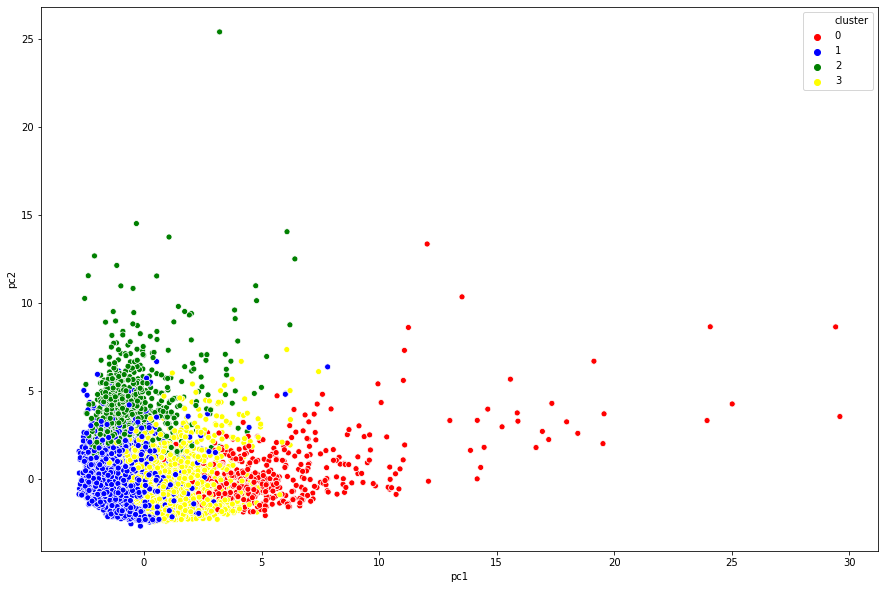

In [10]:
plt.figure(figsize = (15,10))

ax = sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'cluster', data = comps, palette = ['red','blue','green','yellow'])
plt.show()



Dendrogram

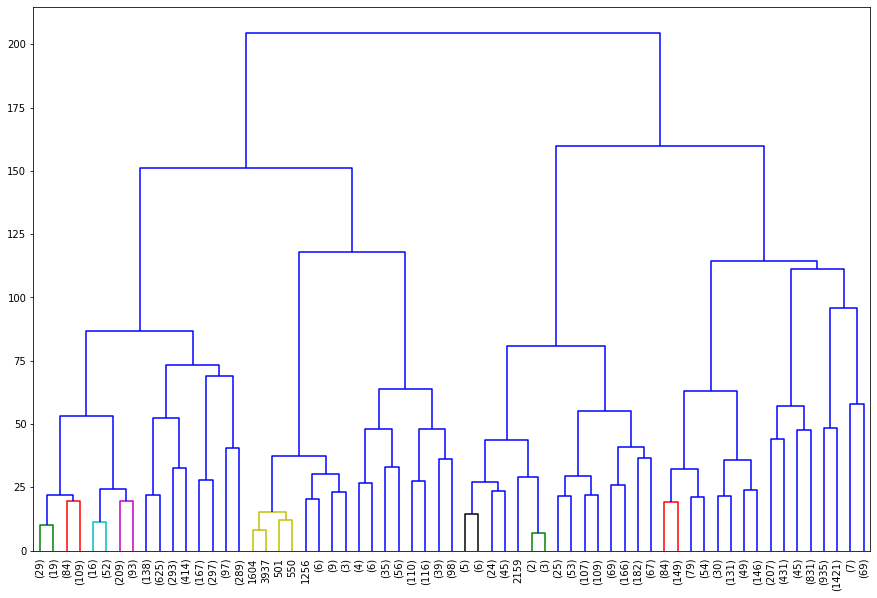

In [11]:
plt.figure(figsize = (15,10))

shc.dendrogram(shc.linkage(scaled_data, method="ward"), leaf_rotation = 90, p = 5, color_threshold = 20,leaf_font_size = 10, truncate_mode = 'level')
plt.show()

K-Means clustering

In [12]:
sum_of_squarred_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters = k)
    km.fit(data)
    sum_of_squarred_distances.append(km.inertia_)

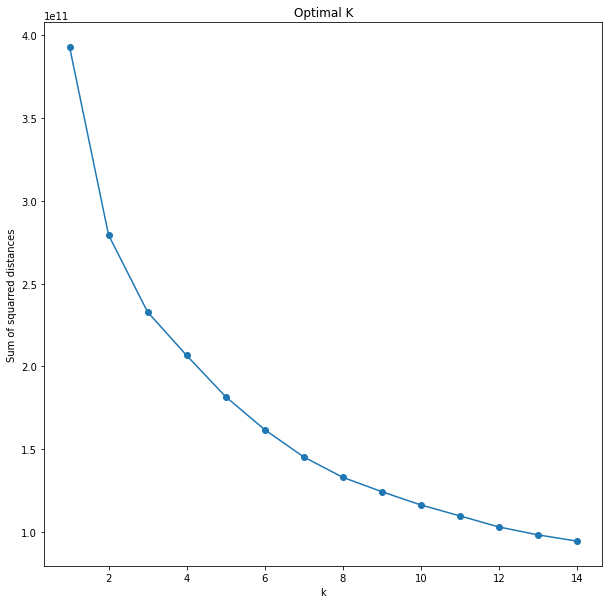

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
plt.plot(K, sum_of_squarred_distances, marker = 'o')
plt.xlabel('k')
plt.ylabel('Sum of squarred distances')
plt.title('Optimal K')
plt.show()

Using the elbow technique we choose k = 4 as the optimal k for our model.

Applying K-means with the optimal K

In [14]:
km = KMeans(4)
km.fit(scaled_data)

kclusters = pd.concat([data, pd.DataFrame({'cluster':km.labels_})], axis=1)

kclusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
1,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,650.233383,0.269313,11.594474
2,1011.839396,0.789924,270.144981,209.932625,60.479311,596.300906,0.170250,0.086301,0.080662,0.114888,2.125974,2.907468,3277.256169,975.330332,586.261175,0.078002,11.446568
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


Ploting K-Means Clusters

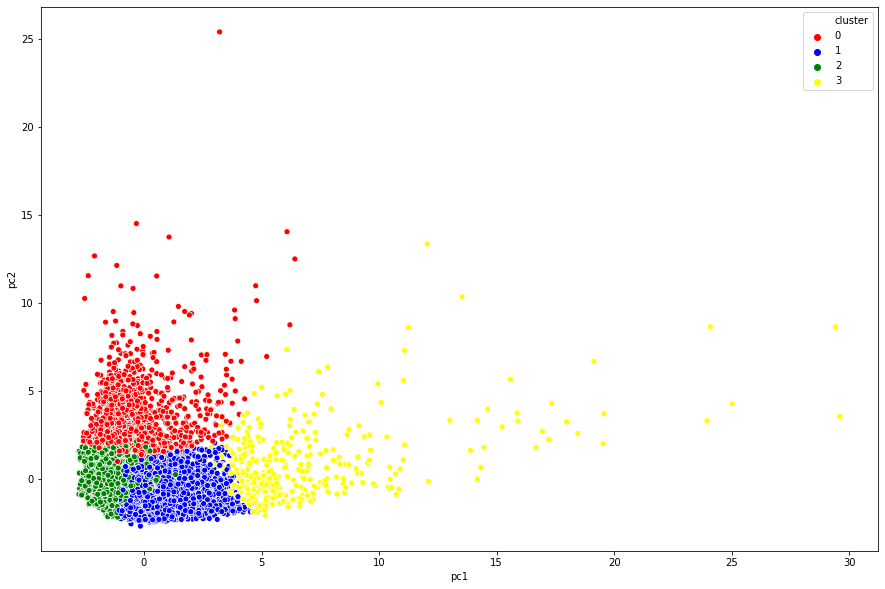

In [19]:
kcomps = pca.fit_transform(scaled_data)
kcomps = pd.DataFrame(data = kcomps
             , columns = ['pc1', 'pc2'])
kcomps = pd.concat([kcomps, pd.DataFrame({'cluster': km.labels_})], axis=1)

plt.figure(figsize = (15,10))

ax = sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'cluster', data = kcomps, palette = ['red','blue','green','yellow'])
plt.show()

Altough the cluster id changed for each category of client when we used K-means, both models gave us almost identical plots and cluster shapes. In addition clusters on the k-means model seem to be better defined and there's less overlapping overal.
